<a href="https://colab.research.google.com/github/Vergaraagustin/DataScience/blob/main/Desafio_FeatureSelection_Vergara_Agustin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estudio predictivo de abandono en tarjeta de crédito.**


Se realizará un análisis de las variables disponibles con el fin de identificar las más relevantes y significativas para predecir el abandono de los clientes potenciales o mejorando la gestión de riesgos y la experiencia del cliente.
El objetivo principal de este análisis es investigar y determinar si hay una disparidad significativa en los ingresos según las distintas variables.


**Objetivos:**

*   Analizar si existen diferencias significativas en los distintos tipos de ingresos entre hombres y mujeres.
*   Analizar si existen diferencias significativas entre los clientes potenciales que abandonan y los que no abandonan.
*   Proporcionar recomendaciones basadas en los resultados obtenidos.






##Carga de API de Kaggle.
  Se realiza carga de base y se tranforma en un dataframe

In [ ]:
!rm -rf /root/.kaggle.

In [ ]:
api_token = {"username":"agustinvergara",
             "key":"72856697dc569bf41ba007e185fe3cc2"}

In [ ]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token,file)

In [ ]:
!kaggle datasets download -d rikdifos/credit-card-approval-prediction

credit-card-approval-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

archivo_zip = '/content/credit-card-approval-prediction.zip'


with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
  for nombre_archivo in zip_file.namelist():
    print(nombre_archivo)


application_record.csv
credit_record.csv


In [ ]:
import pandas as pd

nombre_archivo_csv = 'application_record.csv'

with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
  with zip_file.open(nombre_archivo_csv) as archivo_csv:
    df_app = pd.read_csv(archivo_csv)

In [ ]:
df_app.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

##Limpieza
  Se realiza una limpieza de los datos, la eliminación de 3 columnas que no son importantes para el proyecto, se remplaza datos de la columna de ocupación no se eliminan por que representan en 30% de los datos de dicha columna.

In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df_app.shape

(438557, 18)

In [ ]:
df_app = df_app.drop(['DAYS_BIRTH', 'FLAG_PHONE', 'FLAG_WORK_PHONE'], axis=1)

In [ ]:
df_app.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
df_app["OCCUPATION_TYPE"].isna().sum()/df_app.shape[0]

0.30601039317580153

In [ ]:
df_app["OCCUPATION_TYPE"].fillna("unknown", inplace=True)

##Reportes:
 Los datos revelan lo siguiente
Los trabajadores y asociados comerciales son los que mayores ingresos tienen.
Podemos diferenciar los datos por el estado civil de los clientes, en el cual un gran porcentaje esta casado, viviendo en casas o apartamentos, podemos decir también que el 30% de los clientes no notifico su ocupación actual. Mas del 45% concluyeron el secundario o está en curso, el siguiente son los clientes con nivel de educación más alta.



In [ ]:
# Maximo ingreso de cada tipo de trabajo.
agrupado = df_app.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].max().sort_values( ascending=False)
print(agrupado)

NAME_INCOME_TYPE
Working                 6750000.0
Commercial associate    3950059.5
State servant           3150000.0
Pensioner               1260000.0
Student                  225000.0
Name: AMT_INCOME_TOTAL, dtype: float64


In [ ]:
#Cantidad de dias sin trabajar de cada tipo de trabajo.
df_app.groupby('NAME_INCOME_TYPE')['DAYS_EMPLOYED'].max().sort_values( ascending=False)

NAME_INCOME_TYPE
Pensioner               365243
Commercial associate       -12
Working                    -12
State servant              -16
Student                   -382
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
df_app.NAME_HOUSING_TYPE.value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

Podemos observar que los reportes nos dicen que la mayoría de los clientes tienen casa propia o apartamentos.

In [ ]:
df_app.OCCUPATION_TYPE.value_counts()

unknown                  134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

##Visualizacion de datos.
  Se realizan visualizaciones para una mayor comprensión de los datos.

In [ ]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
fig = px.histogram(df_app, x='AMT_INCOME_TOTAL', nbins=100)
fig.update_layout(title="Distribución de ingresos ")
fig.update_xaxes(title="INGRESOS")
fig.update_yaxes(title="CANTIDAD")

In [ ]:
df_prueba = df_app[['ID','NAME_EDUCATION_TYPE']]
pie_edu = df_prueba.groupby('NAME_EDUCATION_TYPE').count()
pie_edu = pie_edu.rename(columns={'ID': 'Frecuencia'}).squeeze()
pie_edu

NAME_EDUCATION_TYPE
Academic degree                     312
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Secondary / secondary special    301821
Name: Frecuencia, dtype: int64

In [ ]:
fig = px.pie(pie_edu, values='Frecuencia', names=pie_edu.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Porcentajes segun nivel academico")
fig.show()

Contamos con más de la mitad de los clientes en el secundario (68,8%), el siguiente dato es nivel máximo de educación con (26,8%).

In [ ]:
df_prueba2 = df_app[['ID','NAME_FAMILY_STATUS']]
pie_civil = df_prueba2.groupby('NAME_FAMILY_STATUS').count()
pie_civil = pie_civil.rename(columns={'ID': 'Frecuencia'}).squeeze()
pie_civil

NAME_FAMILY_STATUS
Civil marriage           36532
Married                 299828
Separated                27251
Single / not married     55271
Widow                    19675
Name: Frecuencia, dtype: int64

In [ ]:
fig = px.pie(pie_civil, values='Frecuencia', names=pie_civil.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Porcentajes segun Estado civil. ")
fig.show()

Obtuvimos que el 68,4% está casado, con una cantidad casi de 300k, tan solo el 5% es viudo/a que es el dato con menos datos crediticios.

In [ ]:
df_prueba3 = df_app[['ID','NAME_INCOME_TYPE']]
pie_tipo = df_prueba3.groupby('NAME_INCOME_TYPE').count()
pie_tipo = pie_tipo.rename(columns={'ID': 'Frecuencia'}).squeeze()
pie_tipo

NAME_INCOME_TYPE
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Working                 226104
Name: Frecuencia, dtype: int64

In [ ]:
fig = px.pie(pie_tipo, values='Frecuencia', names=pie_tipo.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Porcentajes segun tipo de trabajo. ")
fig.show()

In [ ]:
#Principales medidas estadisticas
df_app.describe().T

count          mean            std        min        25%  \
ID                438557.0  6.022176e+06  571637.023257  5008804.0  5609375.0   
CNT_CHILDREN      438557.0  4.273903e-01       0.724882        0.0        0.0   
AMT_INCOME_TOTAL  438557.0  1.875243e+05  110086.853066    26100.0   121500.0   
DAYS_EMPLOYED     438557.0  6.056368e+04  138767.799647   -17531.0    -3103.0   
FLAG_MOBIL        438557.0  1.000000e+00       0.000000        1.0        1.0   
FLAG_EMAIL        438557.0  1.082071e-01       0.310642        0.0        0.0   
CNT_FAM_MEMBERS   438557.0  2.194465e+00       0.897207        1.0        2.0   

                        50%        75%        max  
ID                6047745.0  6456971.0  7999952.0  
CNT_CHILDREN            0.0        1.0       19.0  
AMT_INCOME_TOTAL   160780.5   225000.0  6750000.0  
DAYS_EMPLOYED       -1467.0     -371.0   365243.0  
FLAG_MOBIL              1.0        1.0        1.0  
FLAG_EMAIL              0.0        0.0        1.0  
CNT_FAM_MEMBERS         2.0        3.0       20.0

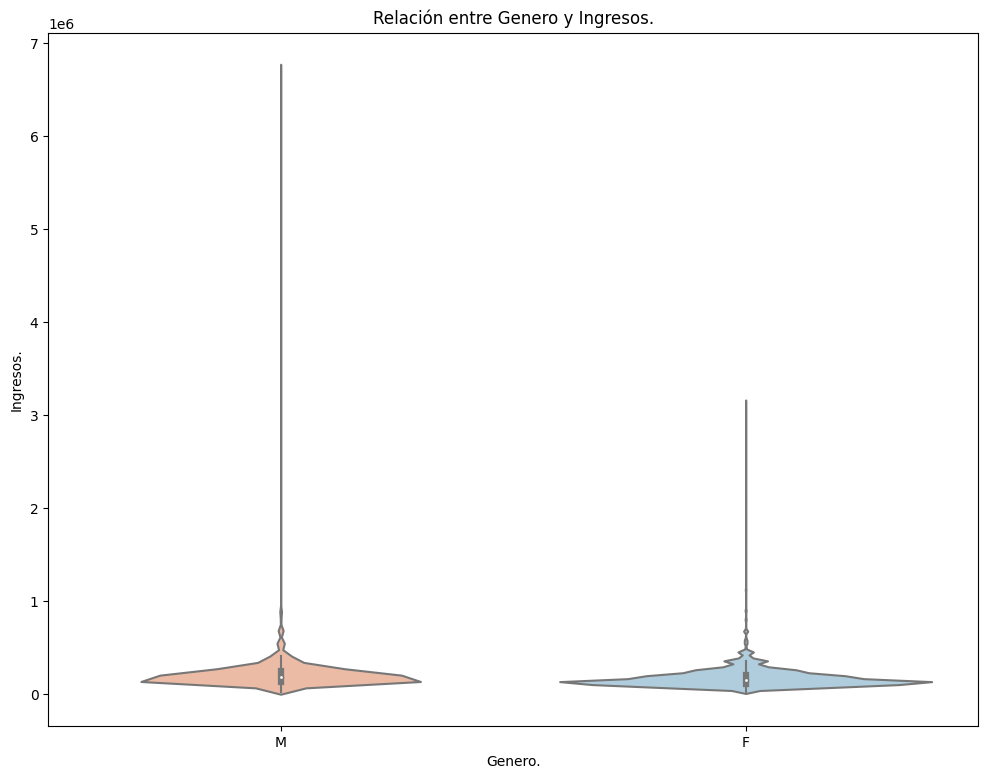

In [ ]:
# cholestrol vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data = df_app, x='CODE_GENDER', y = 'AMT_INCOME_TOTAL', palette = 'RdBu')
plt.title('Relación entre Genero y Ingresos.', fontsize = 12, fontweight = 20)
plt.xlabel("Genero.")
plt.ylabel("Ingresos.")
plt.show()

Podes observar que los ingresos se esplayan en una zona entre la mínima y 500k, donde las mujeres son las que más tienden a ganar menos que los hombres, vemos que los picos de los hombres son mayores.

<Figure size 2000x2000 with 0 Axes>

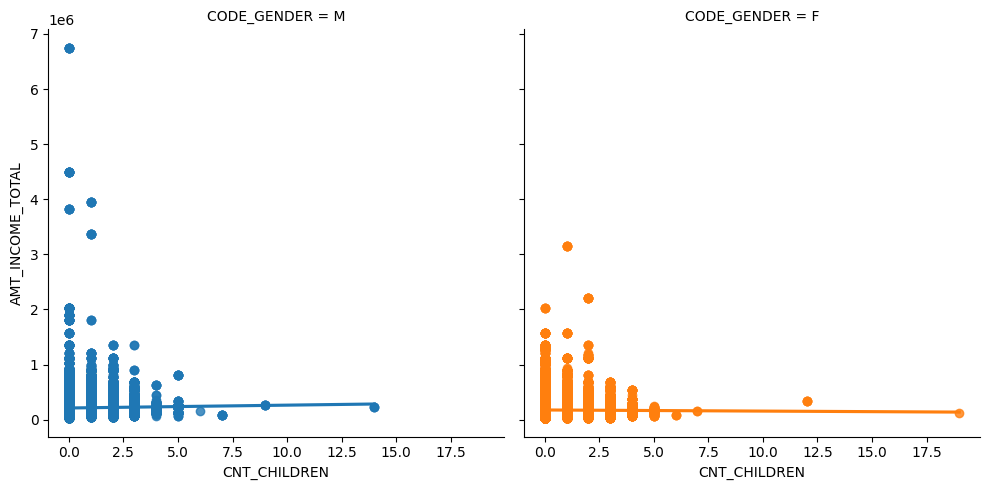

In [ ]:
plt.figure(figsize=(20,20))
sns.lmplot(data=df_app, x="CNT_CHILDREN", y="AMT_INCOME_TOTAL", col='CODE_GENDER',\
           hue='CODE_GENDER')
plt.show()

Podemos deducir que las familias se mantienen con el banco, son fiables de seguir.

Las mujeres tienen el máximo de cantidad de hijos

<Figure size 2000x2000 with 0 Axes>

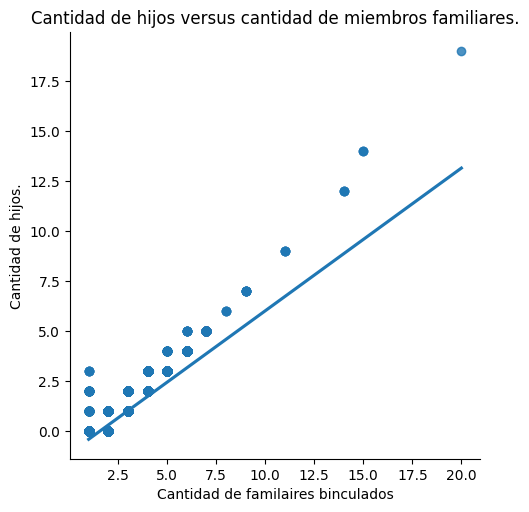

In [ ]:
plt.figure(figsize=(20,20))
sns.lmplot(data=df_app, x="CNT_FAM_MEMBERS", y="CNT_CHILDREN")
plt.title("Cantidad de hijos versus cantidad de miembros familiares.")
plt.xlabel("Cantidad de familaires binculados")
plt.ylabel("Cantidad de hijos.")
plt.show()


Estamos observando en los siguientes gráficos,  en la izquierda tenemos los ingresos versus la cantidad e hijos, tiene una tendencia que a mayor cantidad de hijos los ingresos se mantienen, las personas que no tienen hijos tienen los máximos ingresos.  a la derecha tiene una tendencia a que mayores hijos más familiares son miembros de la tarjeta de crédito.

**Conclusion:**

En base a todos los análisis, y visualizaciones, observamos que si hay sesgo en la base de datos  tiende a que los hombres ganan más que las mujeres.

Los clientes que suman a sus familiares a la tarjeta de crédito son más fiables a la permanencia y no al abandono de la tarjeta.


##Posibles soluciones:
Para poder encontrar los clientes que son buenos o malos:
se dodria generar una calificacion de puntos por clientes, donde se los puntajes van a dar creedibildiad de la permanencia de los clientes.

Los cliente que mas puntos tenfan se les podra ofreces prestamos, aumento de limites creticios.

#Preparacion de codigo para ML
Se realiza la clasificación de los clientes en A, B, C, D y no clasificado.
Donde cada clasificación tiene las siguientes características:

A.	Los ingresos tienen que ser mayores a $3.1 M o tener más de 7 familiares como miembro, vivir con los padres o tener vivir en una casa/ apartamento, y el último requisito tener propiedad.

B.	Los ingresos deben ser mayores a $2.0 M o tener más de 5 familiares como miembros, la condición de dichos ingresos es que sean de tipo comercial o trabajadores. Vivir con los padres o tener vivir en una casa/ apartamento, y el último requisito tener propiedad.

C.	Los ingresos deben estar en un rango que desde 500 k a $2.0 M y tener mas de 3 familiares como miembros, que los ingresos sean de asociación comercial o como servidor del estado y vivir en una casa, apartamento municipal o con los padres.

D.	Los ingresos son igual que en la categoría c pero tienen que tener uno o más familiares que sean miembros, los ingresos de tipo de personal retirado, servidores del estado y rentar apartamentos o vivir en un apartamento municipal.

E.	La última categoría tiene un mínimo requisito es tener ingresos que van desde 0 a $500k.


In [ ]:
import numpy as np

# Definir las condiciones y los valores correspondientes
condiciones = [
    ((df_app['AMT_INCOME_TOTAL'] < 499999.00)),
    ((df_app['AMT_INCOME_TOTAL'] < 2000000.00) & (df_app['CNT_FAM_MEMBERS'] >= 1.0) & ((df_app['NAME_INCOME_TYPE'] == 'Pensioner') | (df_app['NAME_INCOME_TYPE'] =='State servant')) & ((df_app['NAME_HOUSING_TYPE'] == 'Rented apartment') | (df_app['NAME_HOUSING_TYPE'] =='Municipal apartment'))),
    ((df_app['AMT_INCOME_TOTAL'] < 2000000.00) & (df_app['CNT_FAM_MEMBERS'] > 3.0) & ((df_app['NAME_INCOME_TYPE'] == 'Commercial associate') | (df_app['NAME_INCOME_TYPE'] =='State servant')) & ((df_app['NAME_HOUSING_TYPE'] == 'House / apartment') | (df_app['NAME_HOUSING_TYPE'] =='Municipal apartment') | (df_app['NAME_HOUSING_TYPE'] =='With parents'))),
    (((df_app['AMT_INCOME_TOTAL'] > 2000000.00) | (df_app['CNT_FAM_MEMBERS'] > 5.0)) & ((df_app['NAME_INCOME_TYPE'] == 'Commercial associate') | (df_app['NAME_INCOME_TYPE'] =='Working')) & ((df_app['NAME_HOUSING_TYPE'] == 'House / apartment') | (df_app['NAME_HOUSING_TYPE'] =='With parents')) | (df_app['FLAG_OWN_REALTY'] == 'Y')),
    (((df_app['AMT_INCOME_TOTAL'] > 3100000.00) | (df_app['CNT_FAM_MEMBERS'] > 7.0)) | ((df_app['NAME_HOUSING_TYPE'] == 'House / apartment') | (df_app['NAME_HOUSING_TYPE'] =='With parents')) | (df_app['FLAG_OWN_REALTY'] == 'Y'))
]
valores = ['E', 'D', 'C', 'B','A']

df_app['Clasificacion'] = np.select(condiciones, valores, default='E')

In [ ]:
df_app.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_EMPLOYED  FLAG_MOBIL  \
0        Civil marriage   Rented apartment          -4542           1   
1        Civil marriage   Rented apartment          -4542           1   
2               Married  House / apartment          -1134           1   
3  Single / not married  House / apartment          -3051           1   
4  Single / not married  House / apartment          -3051           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS Clasificacion  
0           0         unknown              2.0             E  
1           0         unknown              2.0             E  
2           0  Security staff              2.0             E  
3           1     Sales staff              1.0             E  
4           1     Sales staff              1.0             E

In [ ]:
df_app.Clasificacion.value_counts()

E    433325
B      3711
A      1145
C       357
D        19
Name: Clasificacion, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


X = df_app.drop('Clasificacion', axis =1)
y = df_app[["Clasificacion"]]
X = pd.get_dummies(X)


In [ ]:
#Se seapara partes de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Estandarizar los datos
X_scaled = StandardScaler().fit_transform(X)

# Calcular la matriz de covarianza
cov_matrix = np.cov(X_scaled.T)

# Aplicar PCA
pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_scaled)

# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
component_names = ['PC'+str(i+1) for i in range(len(explained_variance))]

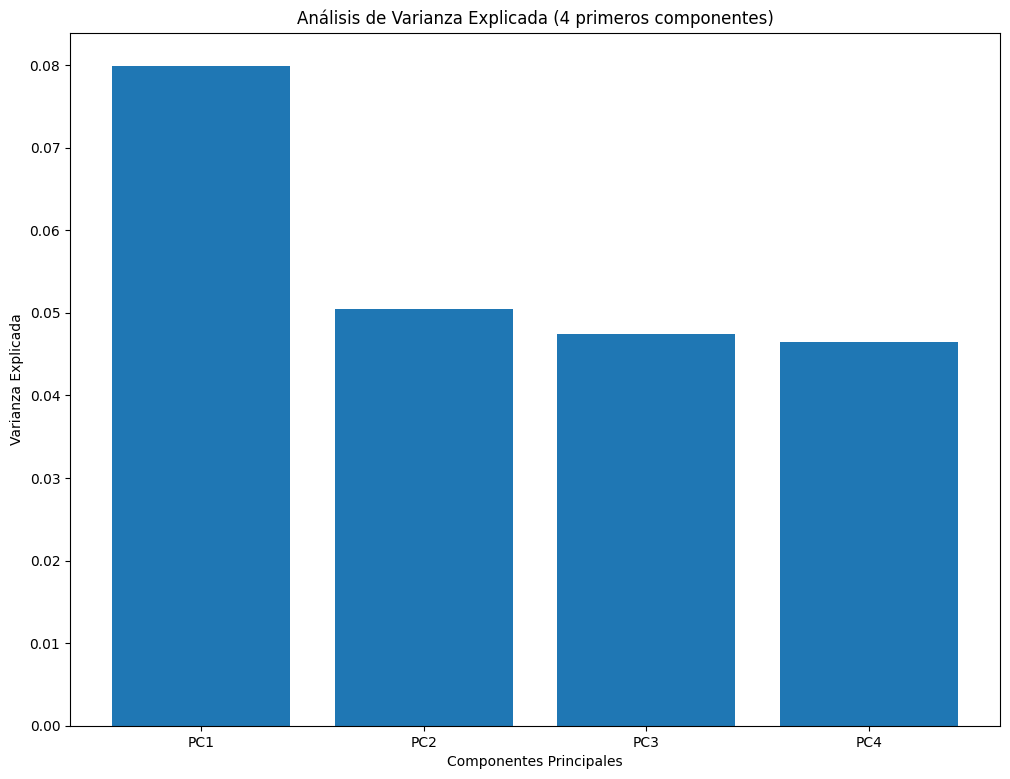

In [ ]:
# Obtener los 4 principales con la varianza explicada más grande
top_components = 4
top_explained_variance = explained_variance[:top_components]
top_component_names = component_names[:top_components]

#Visualizacion.
plt.bar(top_component_names, top_explained_variance)
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Análisis de Varianza Explicada (4 primeros componentes)')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


#Creacion del modelo
rf_classifier = RandomForestClassifier(max_depth=4, random_state=42)
rf_classifier.fit(X_train, y_train)

#Prediccion
y_pred = rf_classifier.predict(X_test)

<ipython-input-39-52c7023b78c8>:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



##Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo:", accuracy)

Accuracy del modelo: 0.9957284446065913


##Importance Feature

In [ ]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
indices
importances

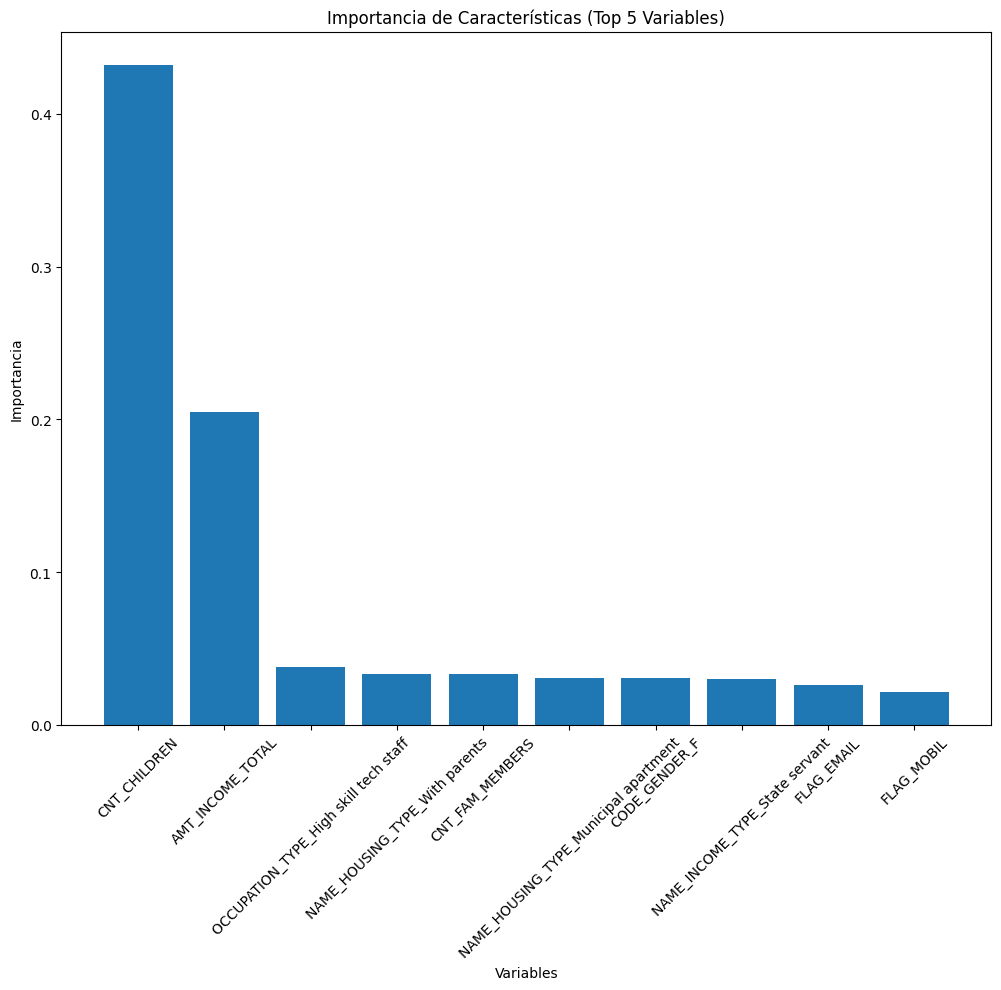

In [ ]:
top_features = X.columns[indices[:10]]
top_importances = importances[indices[:10]]

plt.bar(top_features, top_importances)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de Características (Top 5 Variables)')
plt.xticks(rotation=45)
plt.show()

##Matriz de confusion.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
import seaborn as sns

# Visualizar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.show()

##Calculo de curva Roc

In [ ]:


from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = rf_classifier.predict_proba(X_test)

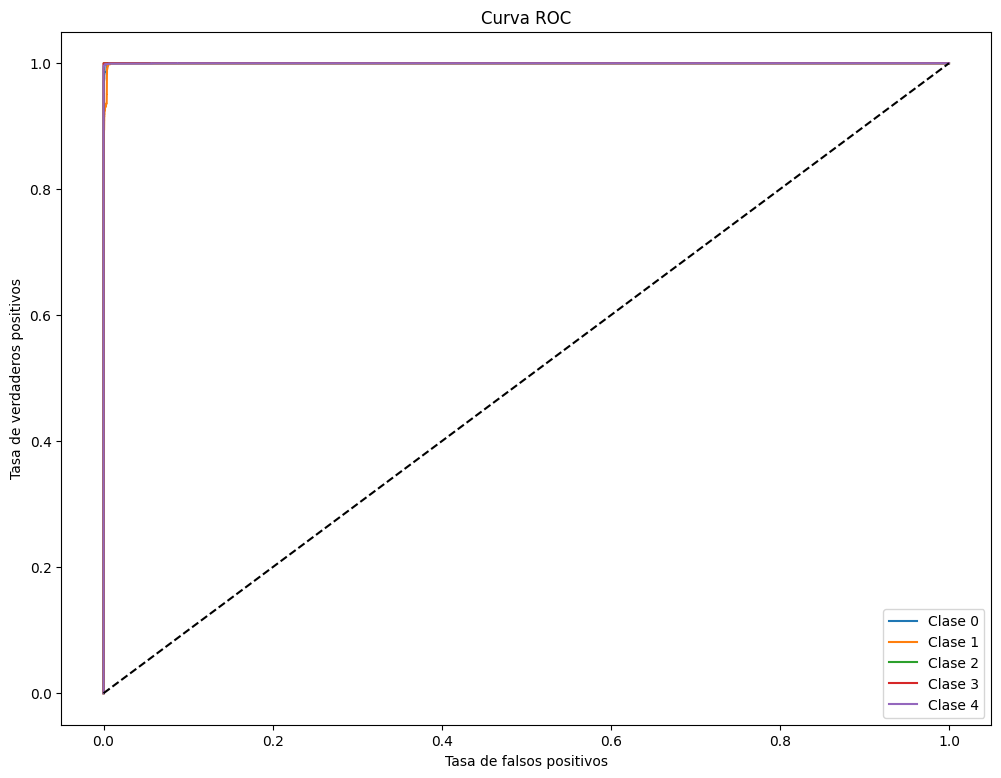

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# y_test: etiquetas verdaderas
# y_scores: puntuaciones de probabilidad predichas por el modelo para cada clase

# Convertir las etiquetas verdaderas a un formato binario (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calcular las tasas de falsos positivos y verdaderos positivos para cada clase
false_positive_rate = dict()
true_positive_rate = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])

# Graficar la curva ROC para cada clase
plt.figure()

for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], label=f'Clase {i}')

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model

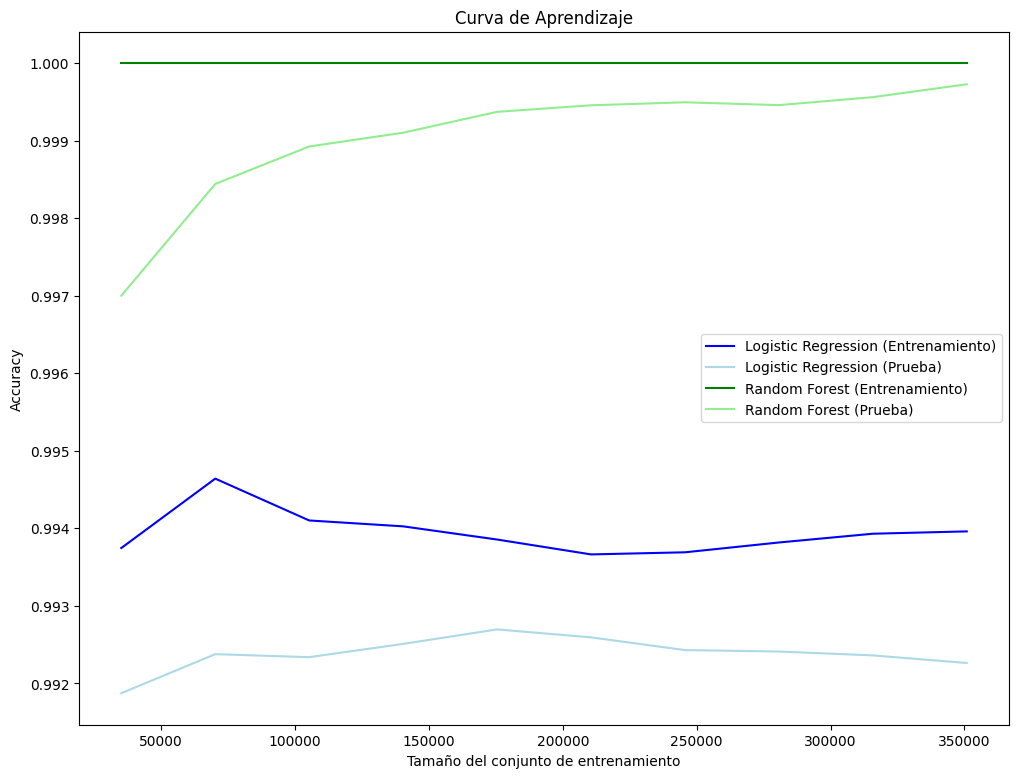

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

# Definir los clasificadores (modelos)
classifier_1 = LogisticRegression()
classifier_2 = RandomForestClassifier()


# Definir una función para calcular el accuracy medio
def calculate_mean_accuracy(X, y, classifier):
    cv_scores = cross_val_score(classifier, X, y, cv=5, scoring=make_scorer(accuracy_score))
    return np.mean(cv_scores)

# Definir los rangos de datos de entrenamiento
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcular la curva de aprendizaje para cada clasificador
train_sizes_abs, train_scores_1, test_scores_1 = learning_curve(classifier_1, X, y, train_sizes=train_sizes, cv=5, scoring=make_scorer(accuracy_score))
train_sizes_abs, train_scores_2, test_scores_2 = learning_curve(classifier_2, X, y, train_sizes=train_sizes, cv=5, scoring=make_scorer(accuracy_score))

# Calcular los valores medios de accuracy
mean_train_scores_1 = np.mean(train_scores_1, axis=1)
mean_test_scores_1 = np.mean(test_scores_1, axis=1)
mean_train_scores_2 = np.mean(train_scores_2, axis=1)
mean_test_scores_2 = np.mean(test_scores_2, axis=1)


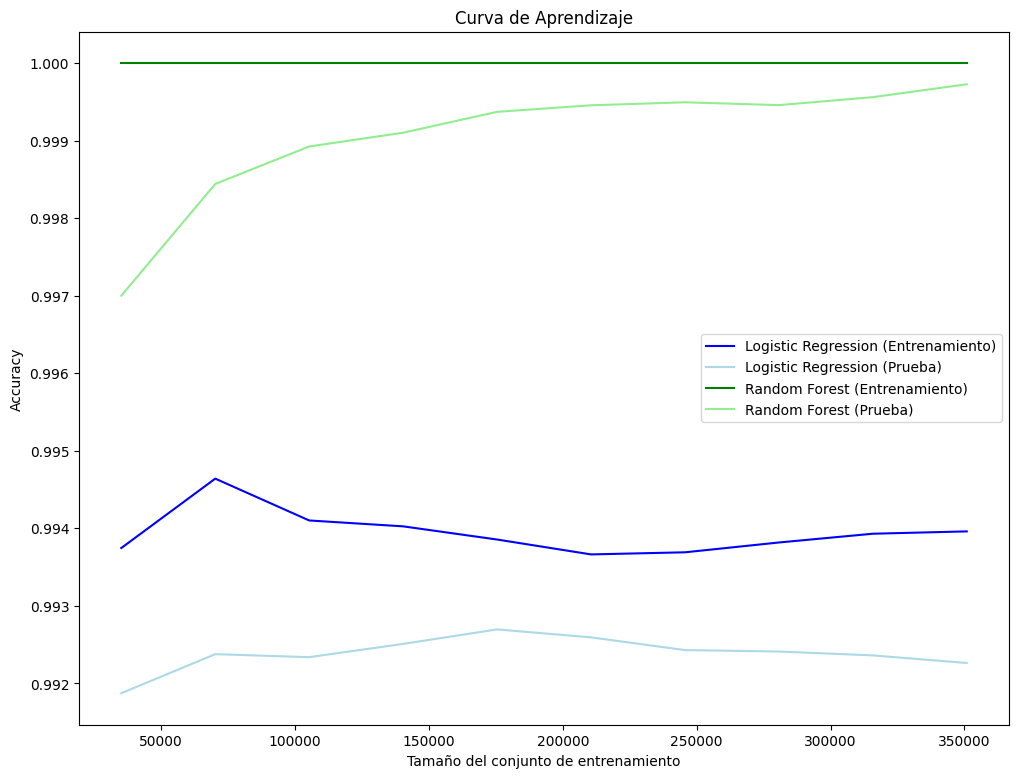

In [ ]:
# Graficar la curva de aprendizaje para cada clasificador
plt.plot(train_sizes_abs, mean_train_scores_1, label='Logistic Regression (Entrenamiento)', color='blue')
plt.plot(train_sizes_abs, mean_test_scores_1, label='Logistic Regression (Prueba)', color='lightblue')
plt.plot(train_sizes_abs, mean_train_scores_2, label='Random Forest (Entrenamiento)', color='green')
plt.plot(train_sizes_abs, mean_test_scores_2, label='Random Forest (Prueba)', color='lightgreen')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Accuracy')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.show()